# Bike Trip Data Analysis

The goal of this project is to wrangle, analyze and visualize data.

## Table of Contents
- [Introduction](#intro)
- [Part I - Gathering Data](#Data_gather)
- [Part II - Accessing Data - Visual and Programatic](#Data_access)
- [Part III - Cleaning Data](#Data_clean)
- [Part IV - Storing Data](#Data_store)
- [Part V - Analyzing and Visualizing Data](#Data_analyze)
        - [Univariate Analysis]
        - [Bivariate Analysis]
        - [Multivariate Analysis]
- [Part VI - Conclusion](#Conc)



<a id='intro'></a>
# Introduction

The data set includes information about individual rides made between 2017 and 2019 in a bike-sharing system covering the greater San Francisco Bay area. The bike sharing system is provided by Bay Wheels under Lyft. Bay Wheels trip history data was downloaded from the below url:

https://s3.amazonaws.com/baywheels-data/index.html


Each trip data includes various details like 

Trip Duration (seconds),
Start Time and Date,
End Time and Date,
Start Station ID,
Start Station Name,
Start Station Latitude,
Start Station Longitude,
End Station ID,
End Station Name,
End Station Latitude,
End Station Longitude,
Bike ID,
User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual),
member_birth_year,
member_gender

We will perform various univariate,bi-variate and multivariate analysis on the data. Both fordgobike and baywheel data is used for the analysis


In [1]:
import pandas as pd
import numpy as np
import requests
import os
import matplotlib.pyplot as plt
import seaborn as sns
from zipfile import ZipFile
from io import BytesIO
from os import listdir
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

<a id='Data_gather'></a>
## Gathering Data

In [3]:
years = ['2017','2018','2019']
months = ['','01','02','03','04','05','06','07','08','09','10','11','12']
companies = ['fordgobike','baywheels']
directory = "data_files"

def extract_file(year,month,company,directory):
    url = "https://s3.amazonaws.com/baywheels-data/{year}{month}-{company}-tripdata.csv.zip".format(year= year ,month=month,company=company)
    response = requests.get(url)
    file = ZipFile(BytesIO(response.content))
    file.extractall(directory)


extract_file(years[0],months[0],companies[0],directory)
for m in months[1:5]:
    extract_file(years[1],m,companies[0],directory)
    extract_file(years[2],m,companies[0],directory)
for m in months[5:]:
    extract_file(years[1],m,companies[0],directory)
    extract_file(years[2],m,companies[1],directory)

In [6]:
# Check if all the files are present in the data folder
filepaths = ["./data_files/"+f for f in listdir("./data_files") if f.endswith(".csv")]
filepaths

['./data_files/2017-fordgobike-tripdata.csv',
 './data_files/201801-fordgobike-tripdata.csv',
 './data_files/201802-fordgobike-tripdata.csv',
 './data_files/201803-fordgobike-tripdata.csv',
 './data_files/201804-fordgobike-tripdata.csv',
 './data_files/201805-fordgobike-tripdata.csv',
 './data_files/201806-fordgobike-tripdata.csv',
 './data_files/201807-fordgobike-tripdata.csv',
 './data_files/201808-fordgobike-tripdata.csv',
 './data_files/201809-fordgobike-tripdata.csv',
 './data_files/201810-fordgobike-tripdata.csv',
 './data_files/201811-fordgobike-tripdata.csv',
 './data_files/201812-fordgobike-tripdata.csv',
 './data_files/201901-fordgobike-tripdata.csv',
 './data_files/201902-fordgobike-tripdata.csv',
 './data_files/201903-fordgobike-tripdata.csv',
 './data_files/201904-fordgobike-tripdata.csv',
 './data_files/201905-baywheels-tripdata.csv',
 './data_files/201906-baywheels-tripdata.csv',
 './data_files/201907-baywheels-tripdata.csv',
 './data_files/201908-baywheels-tripdata.csv'

In [7]:
list_df = []

#Go through each of the file name and the end result will be the list of dataframes
for filename in filepaths:
    file_data = pd.read_csv(filename)
    list_df.append(file_data)

In [8]:
df_bikedata = pd.concat(list_df,ignore_index=True,sort=False)

<a id='Data_access'></a>
## Accessing Data - Visual and Programatic

In [9]:
df_bikedata.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip',
       'rental_access_method'],
      dtype='object')

In [10]:
df_bikedata.shape

(4890404, 17)

In [11]:
df_bikedata.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,rental_access_method
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74.0,Laguna St at Hayes St,37.776435,-122.426244,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1987.0,Male,NaN,NaN
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96.0,Dolores St at 15th St,37.766210,-122.426614,88,Customer,1965.0,Female,NaN,NaN
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245.0,Downtown Berkeley BART,37.870348,-122.267764,245.0,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,NaN,NaN,NaN,NaN
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60.0,8th St at Ringold St,37.774520,-122.409449,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,NaN,NaN,NaN,NaN
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239.0,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247.0,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,1997.0,Female,NaN,NaN


In [12]:
df_bikedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4890404 entries, 0 to 4890403
Data columns (total 17 columns):
duration_sec               int64
start_time                 object
end_time                   object
start_station_id           float64
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    int64
user_type                  object
member_birth_year          float64
member_gender              object
bike_share_for_all_trip    object
rental_access_method       object
dtypes: float64(7), int64(2), object(8)
memory usage: 634.3+ MB


In [13]:
df_bikedata.duplicated().sum()

0

The datatype of most of the columns is Object datatype. This needs to be changed for further analysis.

<a id='Data_clean'></a>
# Cleaning Data

#### Define

#### Code

In [14]:
df_bikedata_bkp = df_bikedata.copy()

#### Test

In [15]:
df_bikedata_bkp.shape

(4890404, 17)

#### Define

Drop latitude and longitude details as they won't be used for analysis.

#### Code

In [16]:
df_bikedata.drop(columns=['start_station_latitude','start_station_longitude','end_station_latitude','end_station_longitude'],axis=1, inplace = True)

#### Test

In [17]:
df_bikedata.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'end_station_id', 'end_station_name', 'bike_id',
       'user_type', 'member_birth_year', 'member_gender',
       'bike_share_for_all_trip', 'rental_access_method'],
      dtype='object')

#### Define

Remove records with missing start_station_id and end_station_id

#### Code

In [18]:
df_bikedata.drop(df_bikedata[df_bikedata['start_station_id'].isna()  | df_bikedata['end_station_id'].isna()].index, inplace = True)

#### Test

In [19]:
df_bikedata['start_station_id'].isna().sum()

0

In [20]:
df_bikedata.user_type.value_counts()

Subscriber    3919263
Customer       859646
Name: user_type, dtype: int64

In [21]:
df_bikedata.bike_share_for_all_trip.value_counts()

No     3775899
Yes     339030
Name: bike_share_for_all_trip, dtype: int64

In [22]:
df_bikedata.rental_access_method.value_counts()

app        19424
clipper     2435
Name: rental_access_method, dtype: int64

#### Define

Fix datatype issues in df_bikedata

#### Code

In [23]:
df_bikedata.start_time = pd.to_datetime(df_bikedata.start_time)
df_bikedata.end_time = pd.to_datetime(df_bikedata.end_time)

df_bikedata.start_station_id = df_bikedata.start_station_id.astype('int')
df_bikedata.end_station_id = df_bikedata.end_station_id.astype('int')


#### Test

In [24]:
df_bikedata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4778909 entries, 0 to 4890081
Data columns (total 13 columns):
duration_sec               int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id           int32
start_station_name         object
end_station_id             int32
end_station_name           object
bike_id                    int64
user_type                  object
member_birth_year          float64
member_gender              object
bike_share_for_all_trip    object
rental_access_method       object
dtypes: datetime64[ns](2), float64(1), int32(2), int64(2), object(6)
memory usage: 474.0+ MB


#### Define

Enhance dataset. 

#### Code

In [25]:
df_bikedata['start_day'] = df_bikedata['start_time'].dt.day
df_bikedata['start_month'] = df_bikedata['start_time'].dt.month
df_bikedata['start_year'] = df_bikedata['start_time'].dt.year
df_bikedata['start_weekday'] = df_bikedata['start_time'].dt.weekday_name

#### Test

In [26]:
df_bikedata.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,rental_access_method,start_day,start_month,start_year,start_weekday
0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,74,Laguna St at Hayes St,43,San Francisco Public Library (Grove St at Hyde...,96,Customer,1987.0,Male,NaN,NaN,31,12,2017,Sunday
1,78800,2017-12-31 15:56:34.842,2018-01-01 13:49:55.617,284,Yerba Buena Center for the Arts (Howard St at ...,96,Dolores St at 15th St,88,Customer,1965.0,Female,NaN,NaN,31,12,2017,Sunday
2,45768,2017-12-31 22:45:48.411,2018-01-01 11:28:36.883,245,Downtown Berkeley BART,245,Downtown Berkeley BART,1094,Customer,NaN,NaN,NaN,NaN,31,12,2017,Sunday
3,62172,2017-12-31 17:31:10.636,2018-01-01 10:47:23.531,60,8th St at Ringold St,5,Powell St BART Station (Market St at 5th St),2831,Customer,NaN,NaN,NaN,NaN,31,12,2017,Sunday
4,43603,2017-12-31 14:23:14.001,2018-01-01 02:29:57.571,239,Bancroft Way at Telegraph Ave,247,Fulton St at Bancroft Way,3167,Subscriber,1997.0,Female,NaN,NaN,31,12,2017,Sunday


<a id='Data_store'></a>
## Storing Data

In [27]:
df_bikedata.to_csv(r'C:\Users\sonale\Desktop\UDACITY-NANODEGREE\PROJECT7\data_files\bikedata_clean.csv',index=False)

<a id='Data_analyze'></a>
## Analyzing and Visualizing Data

We will perform univariate, bivariate, and multivariate analyses on our data

In [ ]:
#df_bikedata = pd.read_csv(r'C:\Users\sonale\Desktop\UDACITY-NANODEGREE\PROJECT7\data\bikedata_clean.csv')

In [28]:
df_bikedata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4778909 entries, 0 to 4890081
Data columns (total 17 columns):
duration_sec               int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id           int32
start_station_name         object
end_station_id             int32
end_station_name           object
bike_id                    int64
user_type                  object
member_birth_year          float64
member_gender              object
bike_share_for_all_trip    object
rental_access_method       object
start_day                  int64
start_month                int64
start_year                 int64
start_weekday              object
dtypes: datetime64[ns](2), float64(1), int32(2), int64(5), object(7)
memory usage: 619.8+ MB


In [29]:
df_bikedata_mybkp = df_bikedata.copy()

In [30]:
df_bikedata_mybkp.shape

(4778909, 17)

<a id='univariate_exp'></a>
## Univariate Exploration

1. Average duration of trips

In [31]:
df_bikedata['duration_min'] = df_bikedata['duration_sec']/60

In [32]:
print(df_bikedata['duration_min'].max(), df_bikedata['duration_min'].min())

1439.4833333333333 1.0


In [33]:
df_bikedata.duration_min.describe()

count    4.778909e+06
mean     1.425803e+01
std      3.821612e+01
min      1.000000e+00
25%      5.966667e+00
50%      9.450000e+00
75%      1.473333e+01
max      1.439483e+03
Name: duration_min, dtype: float64

In [1]:
plt.figure(figsize=[10,8])
rang = np.arange(0, df_bikedata['duration_min'].max() + 60, 15)
plt.hist(data = df_bikedata , x = 'duration_min' , bins = rang, color='green', alpha=0.7)
plt.xlim(0,200)
plt.axvline(df_bikedata.duration_min.mean(), color='r', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(df_bikedata.duration_min.mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(df_bikedata.duration_min.mean()))
plt.title('Distribution of Trip Duration')
plt.xlabel('Duration (Mins)')
plt.ylabel('Frequency')


NameError: name 'plt' is not defined

The histogram is clearly right skewed ad indicates that almost 75% of the data is less than mean duration of 14.26 mins. 
It can be deduced that most people rent bikes for short trips of less than 15 mins. 

2. Which user type rents more bikes?

Text(0, 0.5, 'Total Trips')

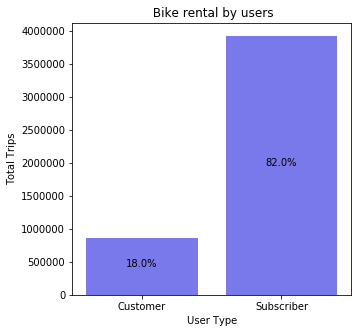

In [35]:
# create the plot
plt.figure(figsize=[5,5])
sns.countplot(data = df_bikedata, x = 'user_type',  color = 'b', alpha=0.6)

# add annotations
n_points = df_bikedata.shape[0]
cat_counts = df_bikedata['user_type'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)

    # print the annotation in the middle of the bar
    plt.text(loc, count*0.5, pct_string, ha = 'center', color = 'k')

plt.title(' Bike rental by users')
plt.xlabel('User Type')
plt.ylabel('Total Trips')

Around 82% of the trips are used by Subscribers whereas only 18% is used by Customers.

3. When is the most number of trips made? (Day, Month and year)

In [36]:
df_bikedata.sort_values(by = 'start_month',ascending =True,inplace=True)

In [37]:
months = {1:'Jan',
          2:'Feb',
          3:'Mar',
          4:'Apr',
          5:'May',
          6:'Jun',
          7:'Jul',
          8:'Aug',
         9:'Sep',
         10:'Oct',
         11:'Nov',
         12:'Dec'}

df_bikedata['start_mon'] = df_bikedata['start_month'].apply(lambda x: months[x])

Text(0, 0.5, 'Number of Trips')

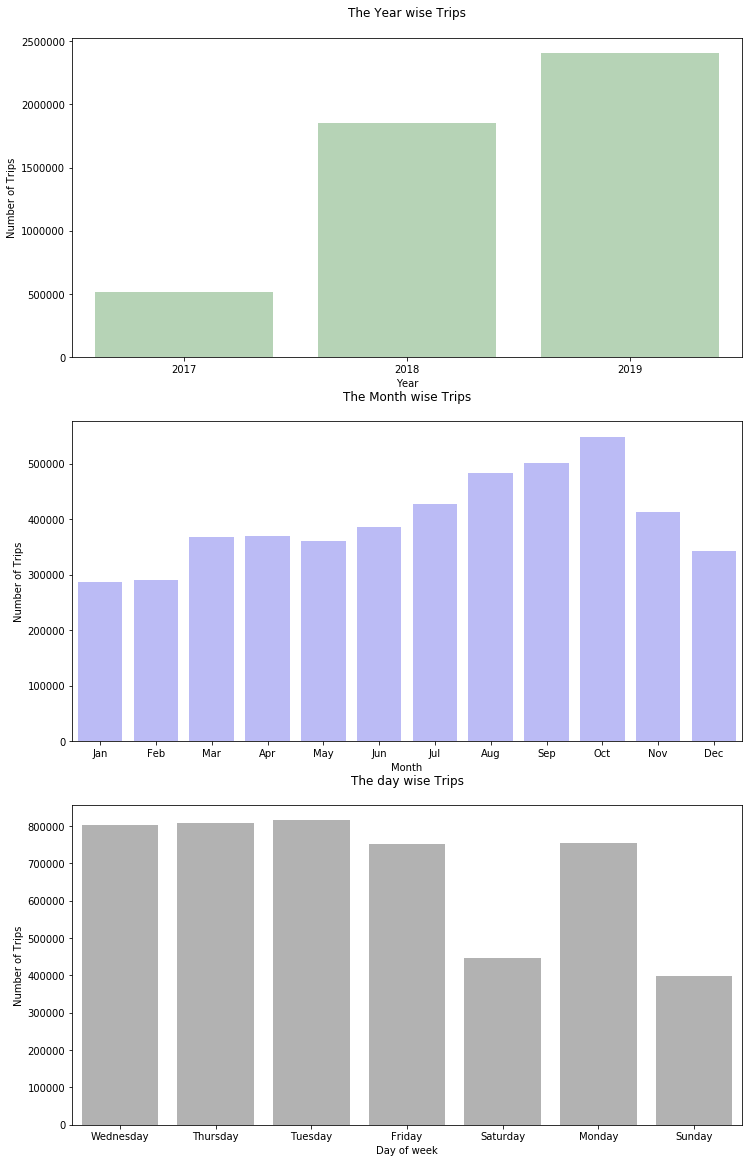

In [38]:
plt.figure(figsize=[12,20])

plt.subplot(3,1, 1)
sns.countplot(data = df_bikedata, x = 'start_year', color = 'g', alpha = 0.3)
plt.title('The Year wise Trips\n')
plt.xlabel('Year')
plt.ylabel('Number of Trips')

plt.subplot(3,1, 2)
sns.countplot(data = df_bikedata, x = 'start_mon', color = 'b', alpha = 0.3)
plt.title('The Month wise Trips\n')
plt.xlabel('Month')
plt.ylabel('Number of Trips')

plt.subplot(3, 1, 3)
sns.countplot(data = df_bikedata, x = 'start_weekday', color = 'k', alpha = 0.3)
plt.title('The day wise Trips\n')
plt.xlabel('Day of week')
plt.ylabel('Number of Trips')

Most trips in were made during the months from August to October. The maximum trips where made in October.
It can be noted that the trips are slightly less in the winter season. 
Trips taken high during weekdays (Mon - Fri) compared to Weekends. It can be justified by the fact that people commute less to work and study during weekends compared to weekdays.

<a id='univariate_exp'></a>
## Bivariate Exploration

1.Is there a change in the trip duration over the years ?

    We need to dig in the correlation between the start month and the trip duration to understand this. In order to understand the data better, I will be focusing on trip duration less than 15 mins, as more than 80% of the trip_duration values are less than 15.

In [39]:
df_new = df_bikedata[df_bikedata.duration_min <= 15.00]

Text(9.924999999999997, 0.5, 'Trip Duration in Minutes')

<Figure size 864x864 with 0 Axes>

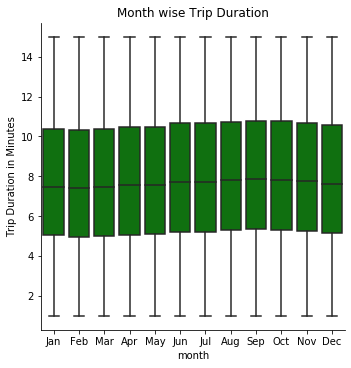

In [41]:
plt.figure(figsize = [12,12]) 
sns.catplot(data = df_new,
            x = 'start_mon' , y = 'duration_min' , kind="box", color = 'g')
plt.title('Month wise Trip Duration')
plt.xlabel('month')
plt.ylabel('Trip Duration in Minutes')

There is no clear trend between the month of bike rental and trip duration. This could be because the weather change in San Francisco is not quite as distinct as in other regions of the country.

2.Does customer type effect the trip duration ?

Text(9.924999999999997, 0.5, 'Trip Duration in Minutes')

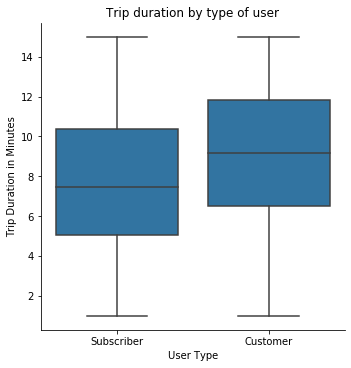

In [42]:
base_color = sns.color_palette()[0]
sns.catplot(data = df_new, x = 'user_type', y = 'duration_min',color = base_color,kind='box')
plt.title('Trip duration by type of user');
plt.xlabel('User Type')
plt.ylabel('Trip Duration in Minutes')

Customers make trips of higher duration than subscribers.

<a id='multivariate_exp'></a>
## Multivariate Exploration

1. How does year,month and usertype effect bike rental?

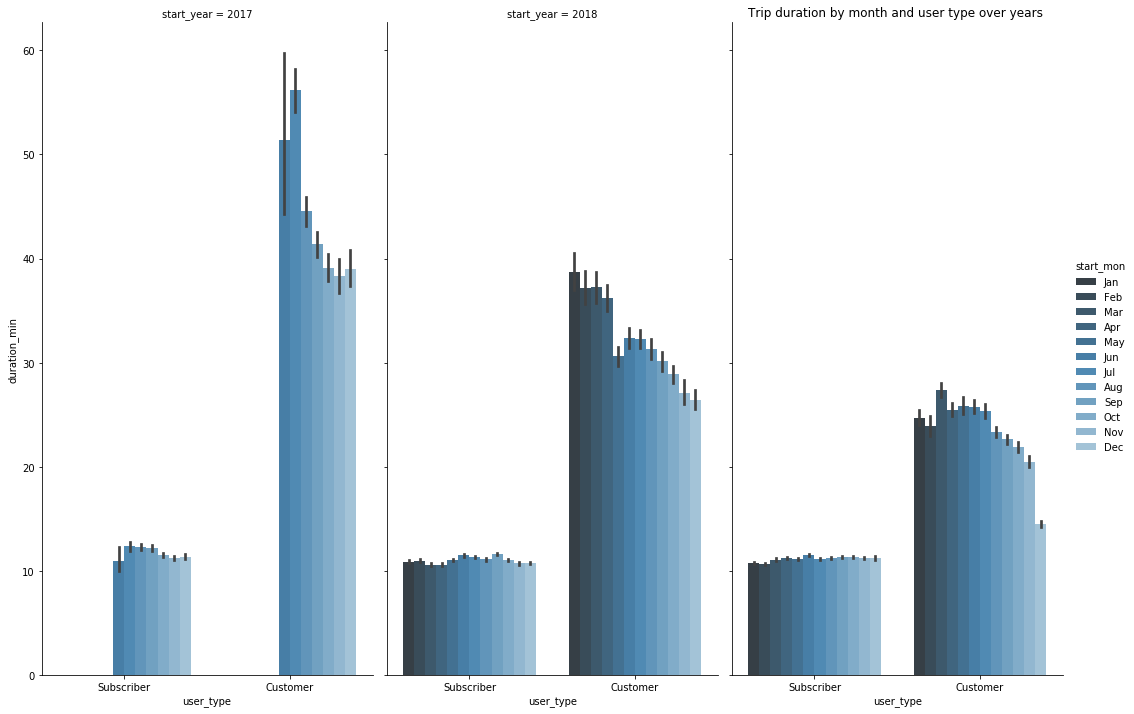

In [43]:
sns.catplot(x="user_type", y="duration_min",
                hue="start_mon", col="start_year",
                data=df_bikedata, kind="bar",
                height=10, aspect=.5, palette="Blues_d");
plt.title('Trip duration by month and user type over years ');

2. How does gender and usertype effect trips made? 

In [44]:
df_ge_us = df_bikedata.groupby(['member_gender','user_type']).size().reset_index(name='counts')
df_ge_us

,member_gender,user_type,counts
0,Female,Customer,105434
1,Female,Subscriber,627305
2,Male,Customer,229746
3,Male,Subscriber,2012259
4,Other,Customer,7332
5,Other,Subscriber,42349


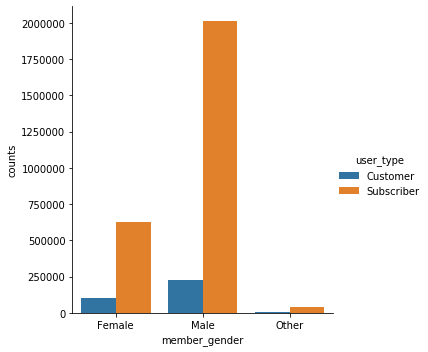

In [45]:
sns.catplot(x="member_gender", y="counts", hue="user_type", kind="bar", data=df_ge_us);

3. Which gender and user type uses more bike_share_for_all_trip's ?

In [46]:
df_bikedata.bike_share_for_all_trip.value_counts()

No     3775899
Yes     339030
Name: bike_share_for_all_trip, dtype: int64

In [47]:
df_s_e =  df_bikedata.groupby(['member_gender','user_type','bike_share_for_all_trip']).size().reset_index(name='counts')
df_s_e

,member_gender,user_type,bike_share_for_all_trip,counts
0,Female,Customer,No,90672
1,Female,Subscriber,No,487489
2,Female,Subscriber,Yes,55957
3,Male,Customer,No,196683
4,Male,Subscriber,No,1521563
5,Male,Subscriber,Yes,175441
6,Other,Customer,No,6422
7,Other,Subscriber,No,30491
8,Other,Subscriber,Yes,6469


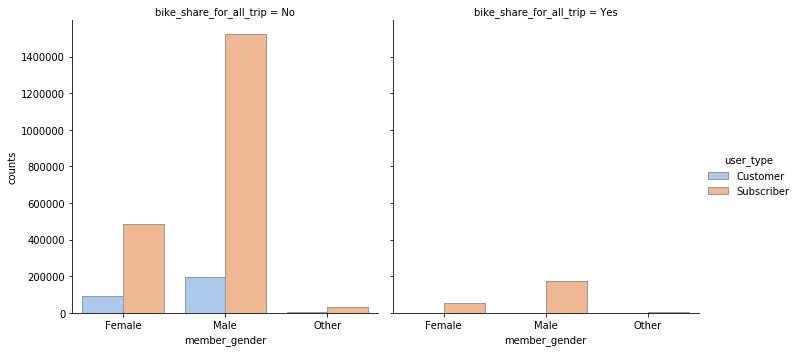

In [48]:
sns.catplot(x="member_gender", y="counts", hue="user_type", col="bike_share_for_all_trip",kind="bar", data=df_s_e,palette="pastel", edgecolor=".6");

Most users don't use Bike Share for All program. 
The program is mostly used by Male users Subscribers.
Customers don't use Bike Share for All program as Customers may not use bike rental multiple times.

### Interesting or surprising interactions between features!

* Even though most number of trips were made by Subscribers, their trip duration was less compared to Customers.
* Interestingly very less users make use of Bike Share for All program.

<a id='Conc'></a>
## Conclusion

### References:
    https://seaborn.pydata.org/tutorial.html
    https://matplotlib.org/3.2.1/gallery/lines_bars_and_markers/categorical_variables.html
    https://stackoverflow.com/questions/20906474/import-multiple-csv-files-into-pandas-and-concatenate-into-one-dataframe  
    